In [1]:
# Import our interpolation module 
import interp

# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Set up path for saving images
savePath = "Images"

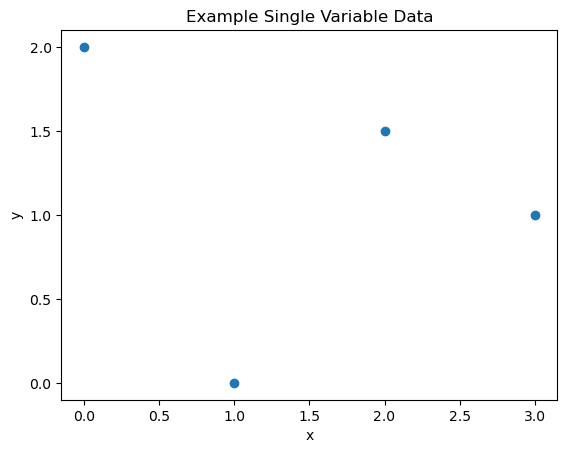

---------------------------------------
Squares Test Image Shape: (5, 5)
Camera Man Test Image Shape: (256, 256)
---------------------------------------


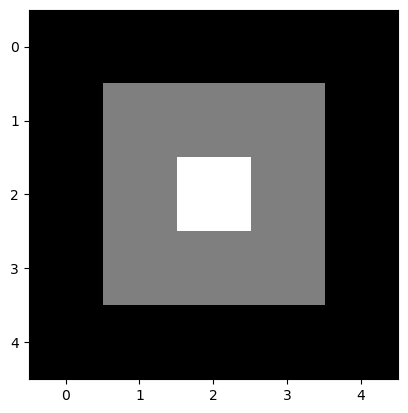

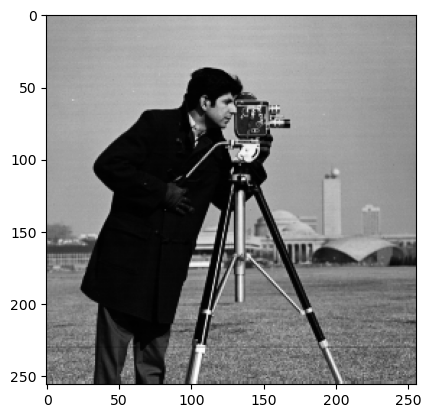

True

In [2]:
### DATA SETUP ###

# Form single variable data
testData = np.array([2, 0, 1.5, 1])

# Plot single variable data
plt.scatter(np.arange(len(testData)), testData)
plt.title("Example Single Variable Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(0,3.5,0.5))
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

# Get test grayscale image data
testImgPath = savePath + "/cameraman.tif"
cameraImg = cv2.imread(testImgPath, cv2.IMREAD_GRAYSCALE)

# Form test image
testImg = np.array([[0,  0,  0,  0,0],
                    [0,127,127,127,0],
                    [0,127,255,127,0],
                    [0,127,127,127,0],
                    [0,  0,  0,  0,0]])


# Display test image shapes
print("---------------------------------------")
print(f"Squares Test Image Shape: {testImg.shape}")
print(f"Camera Man Test Image Shape: {cameraImg.shape}")
print("---------------------------------------")

# Plot test images
plt.imshow(testImg, cmap="gray")
plt.show()
plt.imshow(cameraImg, cmap="gray")
plt.show()

# Save test images
cv2.imwrite(savePath+"/SquaresImgOriginal5x5.png", testImg)
cv2.imwrite(savePath+"/CameraImgOriginal256x256.png", cameraImg)

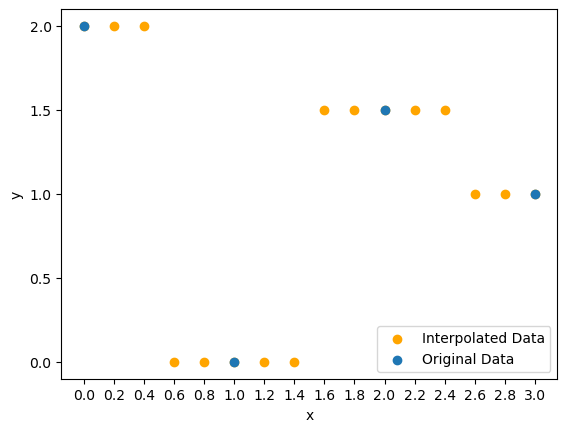

In [3]:
### SINGLE VARIABLE NEAREST NEIGHBOR INTERPOLATION ###

# Interpolate the test data to 16 points
newLen = 16
nnInterpData = interp.nearest_neighbor(testData, newLen)

# Create new x indices for the interpolated data
newIndices = np.linspace(0,len(testData)-1,newLen)

# Plot the interpolated signal
plt.scatter(newIndices, nnInterpData, c="orange")
plt.scatter(np.arange(len(testData)), testData, c="tab:blue")
plt.legend(["Interpolated Data", "Original Data"], loc = "lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(newIndices)
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

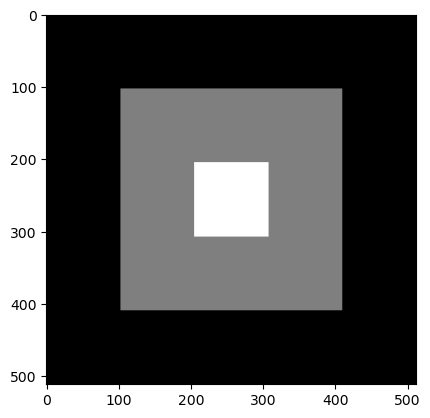

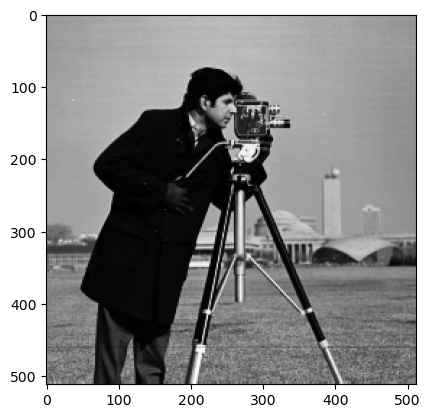

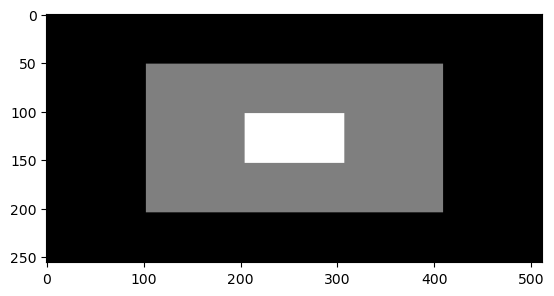

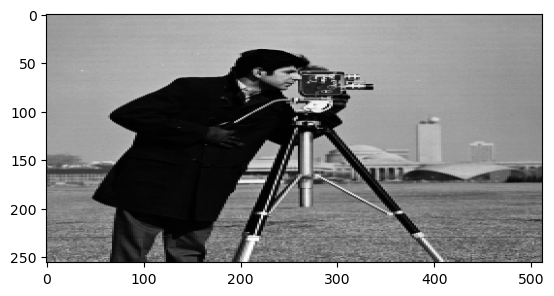

True

In [4]:
### IMAGE NEAREST NEIGHBOR INTERPOLATION ###

# Nearest neighbor interpolate the test and camera images to 512x512
newSize = (512,512)
nnInterpTestImg = interp.nearest_neighbor2(testImg, newSize)
nnInterpCamImg = interp.nearest_neighbor2(cameraImg, newSize)

# Plot interpolated images
plt.imshow(nnInterpTestImg, cmap="gray")
plt.show()
plt.imshow(nnInterpCamImg, cmap="gray")
plt.show()

# Save interpolated images 
cv2.imwrite(savePath+"/nnInterpTestImg512x512.png", nnInterpTestImg)
cv2.imwrite(savePath+"/nnInterpCamImg512x512.png", nnInterpCamImg)

# Nearest neighbor interpolate the test and camera images to 256x512
newSize = (256,512)
nnInterpStretchTestImg = interp.nearest_neighbor2(testImg, newSize)
nnInterpStretchCamImg = interp.nearest_neighbor2(cameraImg, newSize)

# Plot interpolated stretched images
plt.imshow(nnInterpStretchTestImg, cmap="gray")
plt.show()
plt.imshow(nnInterpStretchCamImg, cmap="gray")
plt.show()

# Save interpolated stretched images
cv2.imwrite(savePath+"/nnInterpTestImg256x512.png", nnInterpStretchTestImg)
cv2.imwrite(savePath+"/nnInterpCamImg256x512.png", nnInterpStretchCamImg)

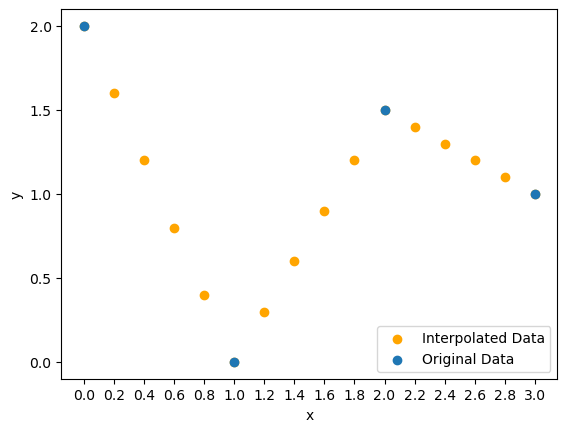

In [5]:
### LINEAR INTERPOLATION ###

# Linear interpolate the test data to 16 points
newLen = 16
linInterpData = interp.linear(testData, newLen)

# Create new x indices for the interpolated data
newIndices = np.linspace(0,len(testData)-1,newLen)

# Plot the interpolated signal
plt.scatter(newIndices, linInterpData, c="orange")
plt.scatter(np.arange(len(testData)), testData, c="tab:blue")
plt.legend(["Interpolated Data", "Original Data"], loc = "lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(newIndices)
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

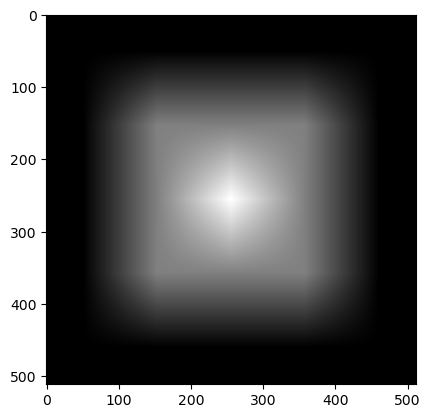

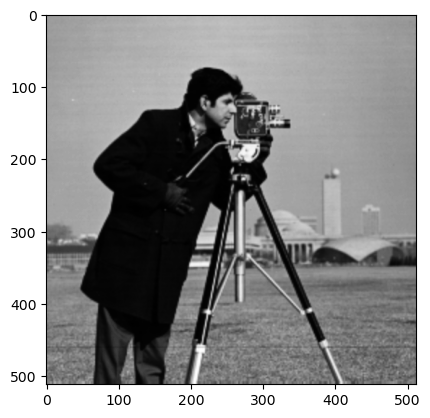

In [6]:
### BILINEAR INTERPOLATION ### 

# Nearest neighbor interpolate the test and camera images to 512x512
newSize = (512,512)
bilinInterpTestImg = interp.bilinear(testImg, newSize)
bilinInterpCamImg = interp.bilinear(cameraImg, newSize)

# Plot interpolated images
plt.imshow(bilinInterpTestImg, cmap="gray")
plt.show()
plt.imshow(bilinInterpCamImg, cmap="gray")
plt.show()